In [8]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
!pip3 install -e .. -U

Obtaining file:///Users/adam/Desktop/Capfolio/tensortrade
  Found existing installation: TensorTrade 0.0.2rc2
    Uninstalling TensorTrade-0.0.2rc2:
      Successfully uninstalled TensorTrade-0.0.2rc2
  Running setup.py develop for tensortrade


In [4]:
from tensortrade.rewards import SimpleProfit
from tensortrade.actions import DiscreteActions
from tensortrade.exchanges.simulated import FBMExchange
from tensortrade.features.stationarity import FractionalDifference
from tensortrade.features.scalers import MinMaxNormalizer
from tensortrade.features import FeaturePipeline

normalize = MinMaxNormalizer(inplace=True)
difference = FractionalDifference(difference_order=0.6,
                                  inplace=True)
feature_pipeline = FeaturePipeline(steps=[normalize, difference])

reward_scheme = SimpleProfit()
action_scheme = DiscreteActions(n_actions=20, instrument='ETH/BTC')

exchange = FBMExchange(base_instrument='BTC',
                       timeframe='1h',
                       pretransform=True)

In [5]:
from tensortrade.environments import TradingEnvironment
from tensortrade.strategies import TensorforceTradingStrategy

network_spec = [
    dict(type='dense', size=128, activation="tanh"),
    dict(type='dense', size=64, activation="tanh"),
    dict(type='dense', size=32, activation="tanh")
]

agent_spec = {
    "type": "ppo",
    "learning_rate": 1e-4,
    "discount": 0.99,
    "likelihood_ratio_clipping": 0.2,
    "estimate_terminal": False,
    "max_episode_timesteps": 2000,
    "network": network_spec,
    "batch_size": 10,
    "update_frequency": "never"
}

environment = TradingEnvironment(exchange=exchange,
                                 action_scheme=action_scheme,
                                 reward_scheme=reward_scheme,
                                 feature_pipeline=feature_pipeline)

strategy = TensorforceTradingStrategy(environment=environment, agent_spec=agent_spec)

/usr/local/lib/python3.7/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [6]:
performance = strategy.run(steps=100, evaluation=False)

performance[-5:]

Timesteps:   0%|          | 0/100 [00:03<?, ?it/s, mean_reward=n/a]

Finished running strategy.
Total episodes: 0 (100 timesteps).
Average reward: 499.89272819158185.


,balance,net_worth
60,7869.041315,19550.777113
61,1918.192763,19800.868234
62,1446.728402,20111.817204
63,15478.289016,20169.594866
64,-86.822099,20026.456292


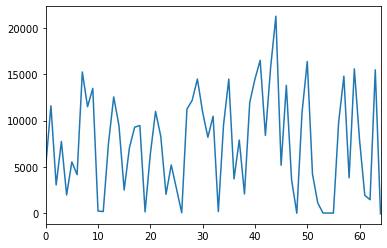

In [9]:
performance.balance.plot()

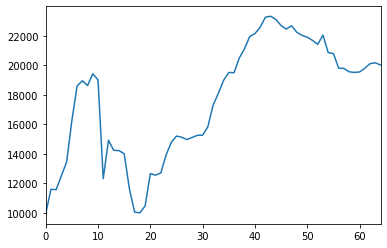

In [10]:
performance.net_worth.plot()

In [ ]:
strategy.save_agent(directory='agents')